## STEP 1

FileNotFoundError: [Errno 2] No such file or directory: '/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/ternary_example/plots_ms/rdf_all_pairs_6_subplots_M3openbeta.png'

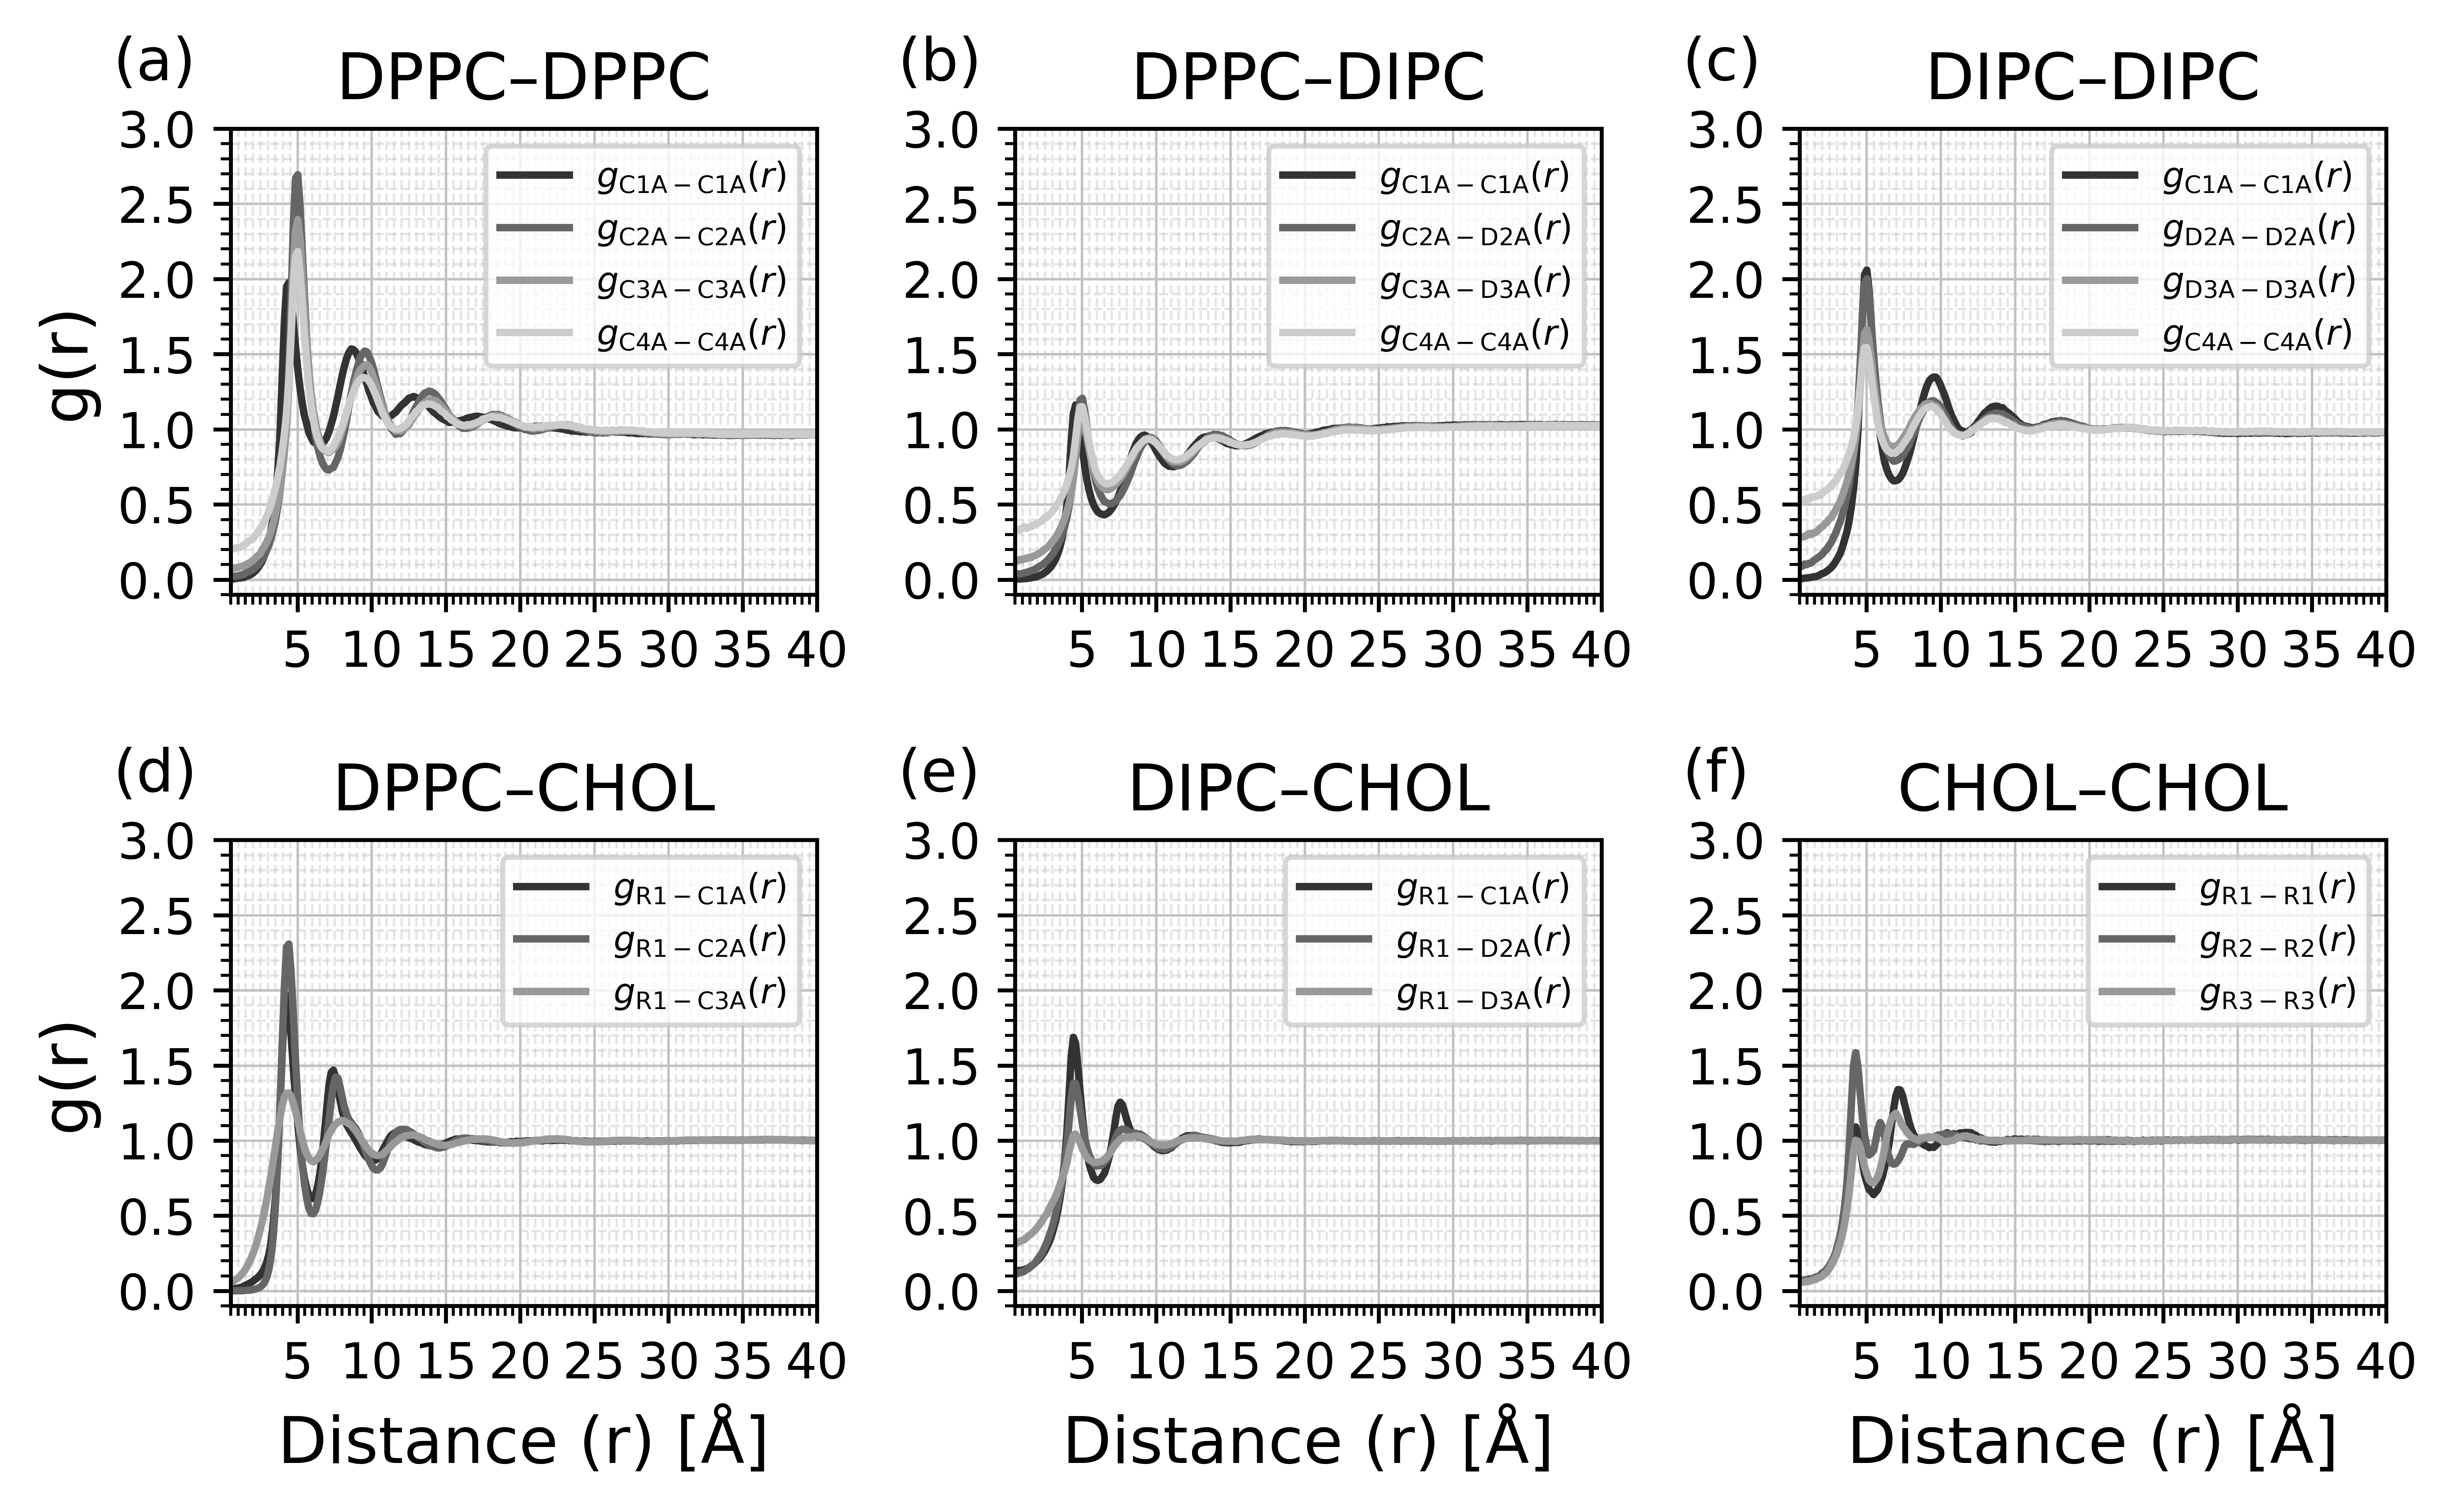

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import csv

# Each entry: (bead_pairs, directory_path, file_suffix, subplot_title)
rdf_specs = [
    ([("C1A", "C1A"), ("C2A", "C2A"), ("C3A", "C3A"), ("C4A", "C4A")],
     "all_beadpairs/", "DPPC_DPPC_0.15.dat", "DPPC–DPPC"),

    ([("C1A", "C1A"), ("C2A", "D2A"), ("C3A", "D3A"), ("C4A", "C4A")],
     "all_beadpairs/", "DPPC_DIPC_0.15.dat", "DPPC–DIPC"),

    ([("C1A", "C1A"), ("D2A", "D2A"), ("D3A", "D3A"), ("C4A", "C4A")],
     "all_beadpairs/", "DIPC_DIPC_0.15.dat", "DIPC–DIPC"),

    ([("R1", "C1A"), ("R1", "C2A"), ("R1", "C3A")],
     "all_beadpairs/", "DPPC_CHOL_0.15.dat", "DPPC–CHOL"),

    ([("R1", "C1A"), ("R1", "D2A"), ("R1", "D3A")],
     "all_beadpairs/", "DIPC_CHOL_0.15.dat", "DIPC–CHOL"),

    ([("R1", "R1"), ("R2", "R2"), ("R3", "R3")],
     "all_beadpairs/", "CHOL_CHOL_0.15.dat", "CHOL–CHOL")
]

# Define grey gradient colors
grey_colors = ["#333333", "#666666", "#999999", "#cccccc"]

# Create figure
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(7, 4.4), dpi=1000)
axs = axs.flatten()

for ax_idx, (i_j_pairs, data_dir, file_suffix, title) in enumerate(rdf_specs):
    ax = axs[ax_idx]
    color_idx = 0

    dat_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(file_suffix)]
    for i_j in i_j_pairs:
        for file in dat_files:
            try:
                filename = os.path.basename(file)
                parts = filename.split('_')
                if len(parts) < 6:
                    continue
                i, j, k, l = parts[2], parts[3], parts[4], parts[5]
                if (i, j) != i_j:
                    continue

                data = np.loadtxt(file, skiprows=1)
                radii = data[:, 0][1:300]
                avg_gofr = data[:, 1][1:300]

                label = fr'$g_{{\mathrm{{{i}-{j}}}}}(r)$'
                ax.plot(radii, avg_gofr, linewidth=1.5,
                        label=label, color=grey_colors[color_idx % len(grey_colors)])
                color_idx += 1
                break

            except Exception as e:
                print(f"Error processing file {file}: {e}")

    axs[3].set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[4].set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[5].set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[0].set_ylabel('g(r)', fontsize=13)
    axs[3].set_ylabel('g(r)', fontsize=13)

    ax.set_xlim([0.5, 40])
    ax.set_ylim([-0.1, 3])
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.grid(visible=True, color='#C4C1BE', linestyle='-', linewidth=0.5)
    ax.grid(which="minor", visible=True, color='#C4C1BE', linestyle='--', linewidth=0.5, alpha=0.4)
    ax.set_title(title, fontsize=13)
    ax.legend(fontsize=7, loc='upper right')

# Subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for idx, ax in enumerate(axs):
    ax.text(
        -0.2, 1.2,
        subplot_labels[idx],
        transform=ax.transAxes,
        fontsize=12,
        va='top',
        ha='left'
    )

plt.tight_layout()
# os.makedirs("plot_ms", exist_ok=True)
plt.savefig("plots_ms/rdf_all_pairs_6_subplots_M3openbeta.png", dpi=1000)
plt.show()


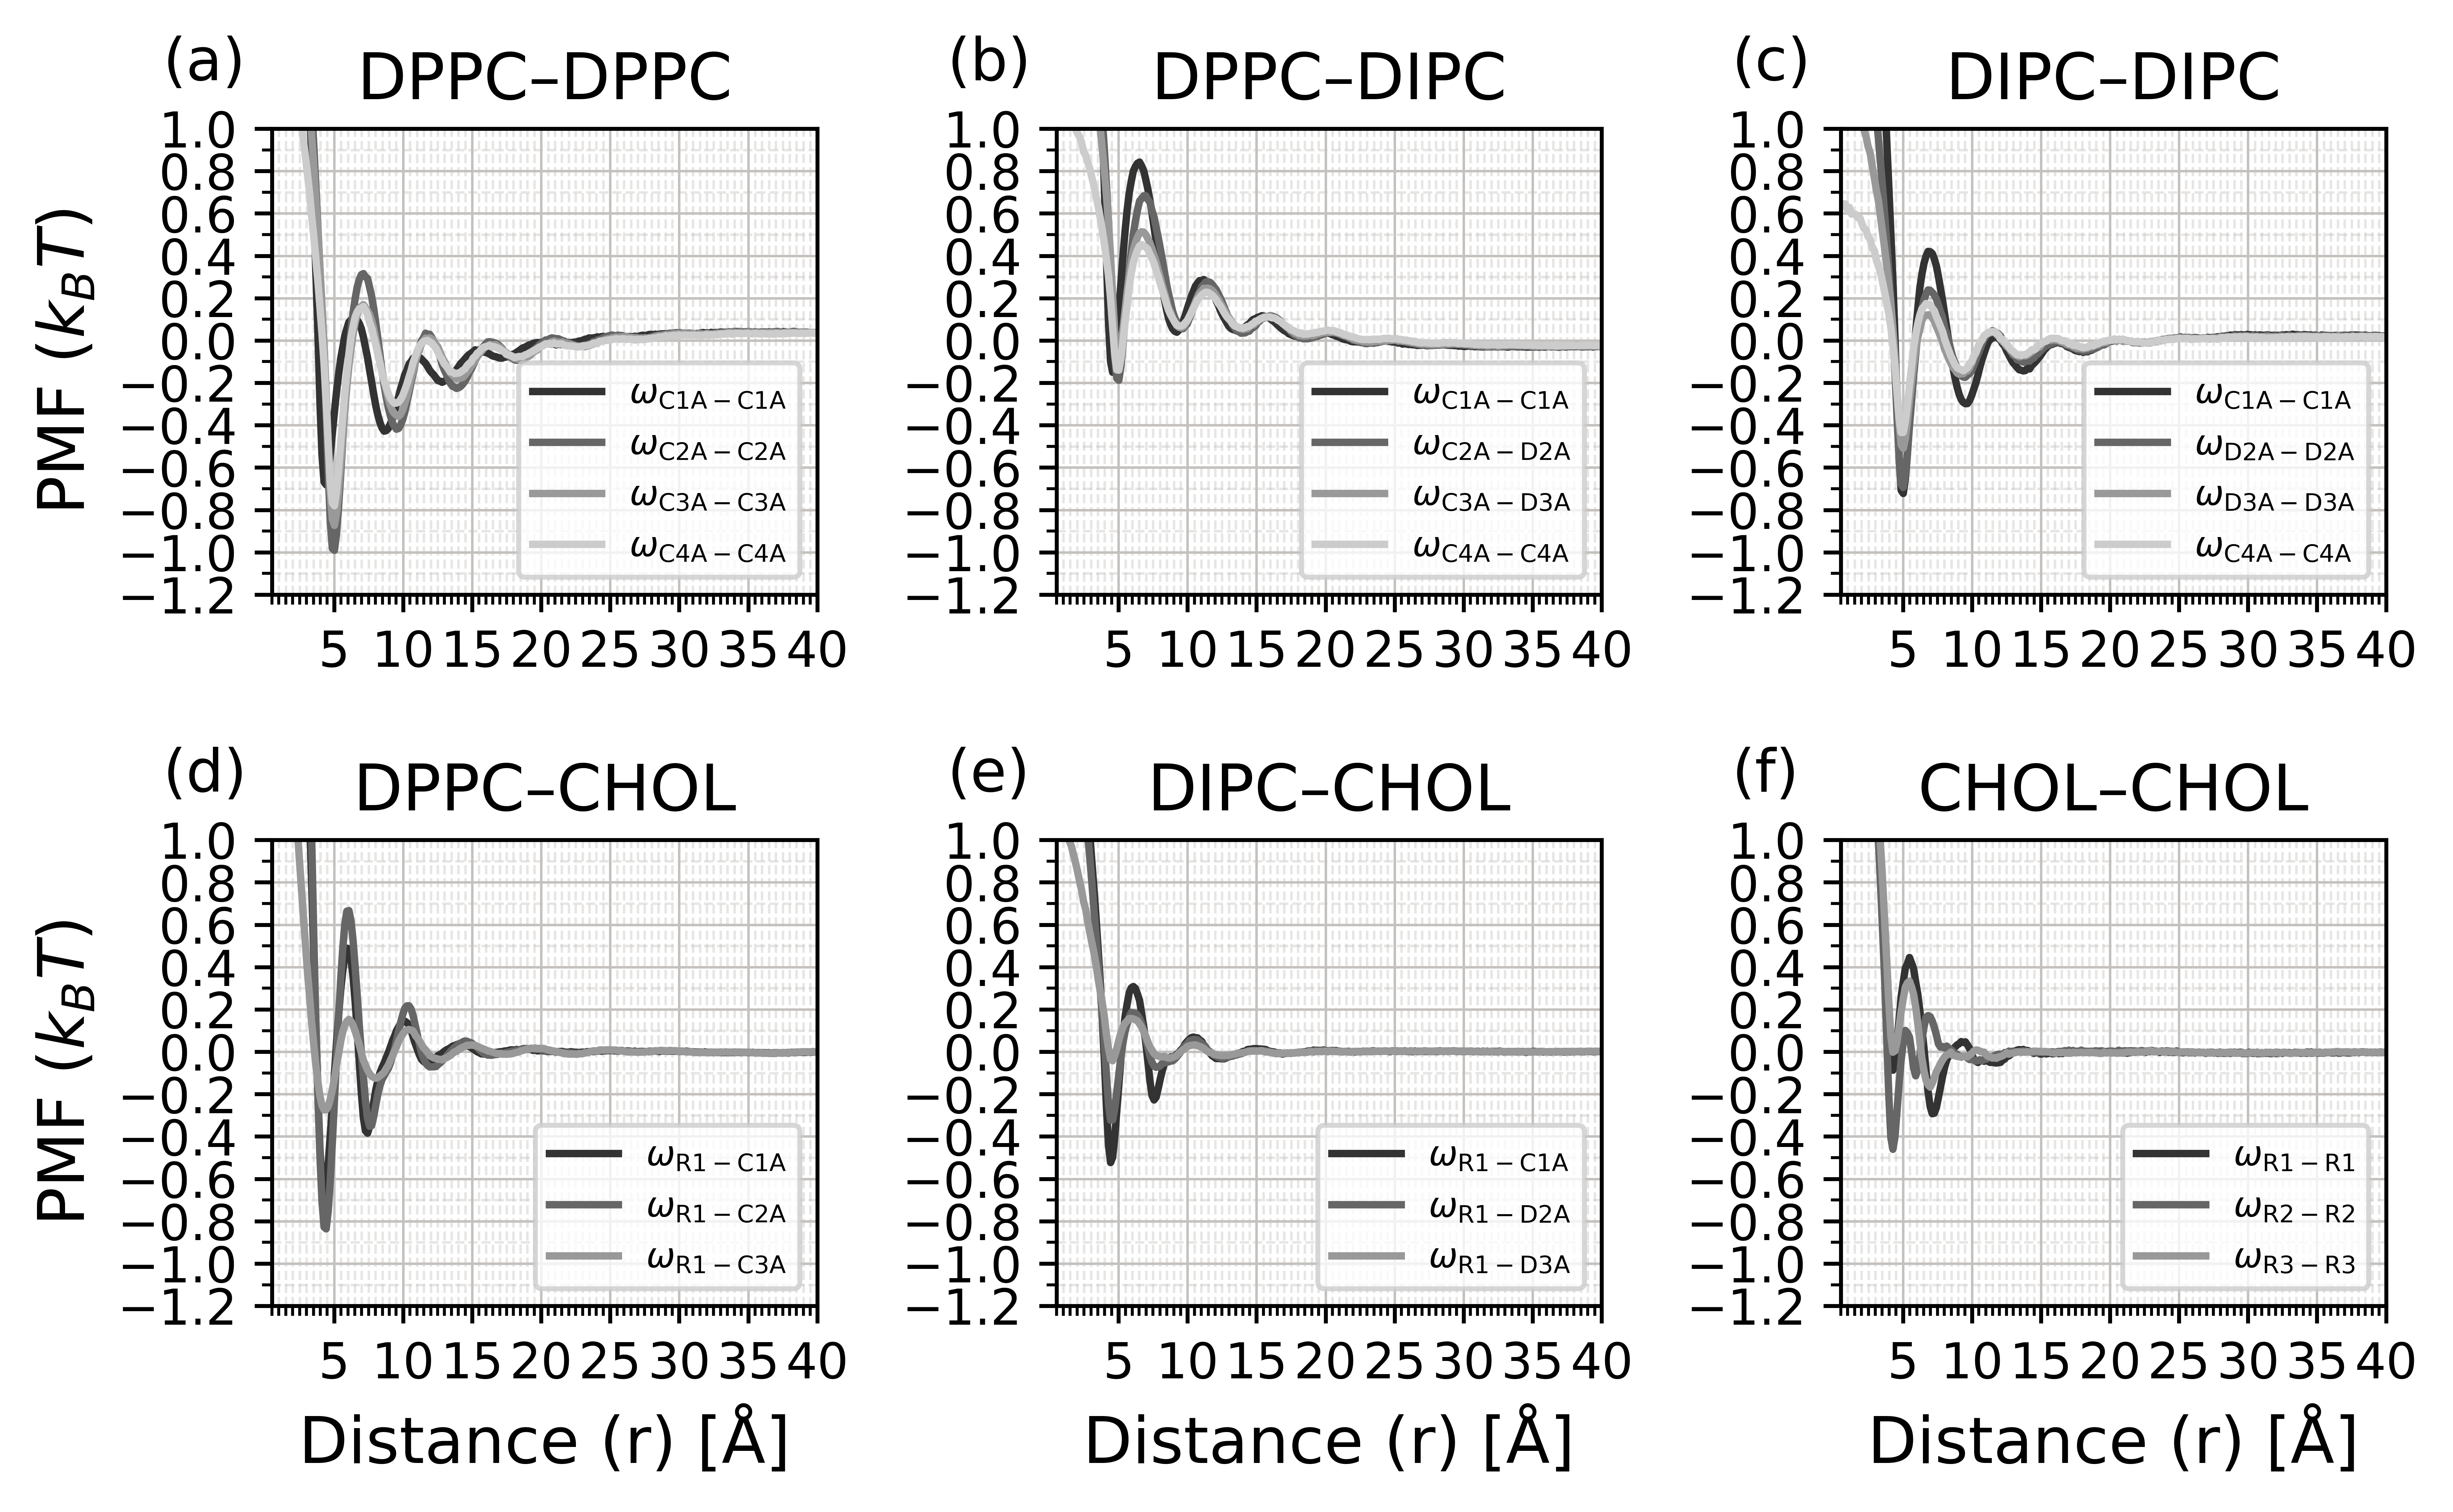

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# # Constants
# k_B = 1.380649e-23  # Boltzmann constant in J/K
# T = 300.15          # Temperature in Kelvin
# kBT = k_B * T       # k_B * T in J

# Each entry corresponds to: (bead_pairs, directory_path, file_suffix, subplot_title)
pmf_specs = [

    ([("C1A", "C1A"), ("C2A", "C2A"), ("C3A", "C3A"), ("C4A", "C4A")],
     "all_beadpairs/", "DPPC_DPPC_0.15.dat", "DPPC–DPPC"),

    ([("C1A", "C1A"), ("C2A", "D2A"), ("C3A", "D3A"), ("C4A", "C4A")],
     "all_beadpairs/", "DPPC_DIPC_0.15.dat", "DPPC–DIPC"),

    ([("C1A", "C1A"), ("D2A", "D2A"), ("D3A", "D3A"), ("C4A", "C4A")],
     "all_beadpairs/", "DIPC_DIPC_0.15.dat", "DIPC–DIPC"),

    ([("R1", "C1A"), ("R1", "C2A"), ("R1", "C3A")],
     "all_beadpairs/", "DPPC_CHOL_0.15.dat", "DPPC–CHOL"),

    ([("R1", "C1A"), ("R1", "D2A"), ("R1", "D3A")],
     "all_beadpairs/", "DIPC_CHOL_0.15.dat", "DIPC–CHOL"),

    ([("R1", "R1"), ("R2", "R2"), ("R3", "R3")],
     "all_beadpairs/", "CHOL_CHOL_0.15.dat", "CHOL–CHOL")
]


# # Each entry corresponds to: (bead_pairs, directory_path, file_suffix, subplot_title)
# pmf_specs = [

#     ([("C1A", "C1A"), ("C2A", "C2A"), ("C3A", "C3A"), ("C4A", "C4A")],
#      "/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/Fig3-RDF-PMF/M3_openbeta_corrected/all_beadpairs/", "DPPC_DPPC_0.15.dat", "DPPC–DPPC"),

#     ([("C1A", "C1A"), ("C2A", "D2A"), ("C3A", "D3A"), ("C4A", "C4A")],
#      "/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/Fig3-RDF-PMF/M3_openbeta_corrected/all_beadpairs/", "DPPC_DIPC_0.15.dat", "DPPC–DIPC"),

#     ([("C1A", "C1A"), ("D2A", "D2A"), ("D3A", "D3A"), ("C4A", "C4A")],
#      "/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/Fig3-RDF-PMF/M3_openbeta_corrected/all_beadpairs/", "DIPC_DIPC_0.15.dat", "DIPC–DIPC"),

#     ([("R2", "C1A"), ("R2", "C2A"), ("R2", "C3A")],
#      "/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/Fig3-RDF-PMF/M3_openbeta_corrected/all_beadpairs/", "DPPC_CHOL_0.15.dat", "DPPC–CHOL"),

#     ([("R2", "C1A"), ("R2", "D2A"), ("R2", "D3A")],
#      "/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/Fig3-RDF-PMF/M3_openbeta_corrected/all_beadpairs/", "DIPC_CHOL_0.15.dat", "DIPC–CHOL"),

#     ([("R1", "R1"), ("R2", "R2"), ("R3", "R3")],
#      "/projectnb/mcprot/nayaksp/MD_simulation/Martini3_sim/FH-ternary-phase-diagram-manuscript-plots/Fig3-RDF-PMF/M3_openbeta_corrected/all_beadpairs/", "CHOL_CHOL_0.15.dat", "CHOL–CHOL")
# ]

# Define grey gradient colors
grey_colors = ["#333333", "#666666", "#999999", "#cccccc"]

# Create figure with 6 subplots (2 rows × 3 columns)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(7, 4.4), dpi=1000)
#fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(7, 4.4), dpi=1000, sharex = True, sharey = True)
axs = axs.flatten()

import csv

legend_entries = []  # Will store tuples of (title, bead_pair, delta_G)


# Loop over all defined specs
for ax_idx, (i_j_pairs, data_dir, file_suffix, title) in enumerate(pmf_specs):
    ax = axs[ax_idx]
    color_idx = 0

    dat_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(file_suffix)]
    for i_j in i_j_pairs:
        for file in dat_files:
            try:
                filename = os.path.basename(file)
                parts = filename.split('_')
                if len(parts) < 6:
                    continue
                i, j, k, l = parts[2], parts[3], parts[4], parts[5]
                if (i, j) != i_j:
                    continue

                data = np.loadtxt(file, skiprows=1)
                radii = data[:, 0][1:300]
                avg_gofr = data[:, 1][1:300]

                with np.errstate(divide='ignore', invalid='ignore'):
                    pmf_kBT = -np.log(avg_gofr)
                    pmf_kBT[np.isinf(pmf_kBT)] = np.nan

                min_pmf = np.nanmin(pmf_kBT)
                sat_pmf = pmf_kBT[-1]
                delta_G = min_pmf - sat_pmf
                
                legend_entries.append((title, f'{i}-{j}', f'{delta_G:.2f}')) ## save data 
                
                label = fr'$\omega_{{\mathrm{{{i}-{j}}}}}$'
                ax.plot(radii, pmf_kBT, linewidth=1.5,
                        label=label, color=grey_colors[color_idx % len(grey_colors)])
                color_idx += 1
                break

            except Exception as e:
                print(f"Error processing file {file}: {e}")

    #ax.set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[3].set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[4].set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[5].set_xlabel('Distance (r) [Å]', fontsize=13)
    axs[0].set_ylabel('PMF ($k_B T$)', fontsize=13)
    axs[3].set_ylabel('PMF ($k_B T$)', fontsize=13)
    ax.set_xlim([0.5, 40])
    ax.set_ylim([-1.2, 1])
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.grid(visible=True, color='#C4C1BE', linestyle='-', linewidth=0.5)
    ax.grid(which="minor", visible=True, color='#C4C1BE', linestyle='--', linewidth=0.5, alpha=0.4)
    ax.set_title(title, fontsize=13)
    ax.legend(fontsize=7, loc='lower right')

# Add subplot labels (a), (b), (c), ...
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for idx, ax in enumerate(axs):
    ax.text(
        -0.2, 1.2,  # relative position within each subplot
        subplot_labels[idx],
        transform=ax.transAxes,
        fontsize=12,
        #fontweight='bold',
        va='top',
        ha='left'
    )

# fig.subplots_adjust(wspace=0.4, hspace=0.4)
# Final layout adjustments
plt.tight_layout()
os.makedirs("plots_ms", exist_ok=True)
plt.savefig("plots_ms/pmf_all_pairs_6_subplots_M3openbeta.png", dpi=1000)
plt.show()

# Save legend entries to a CSV file
legend_output_path = os.path.join("plots", "pmf_deltaG_table.csv")
with open(legend_output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Interaction", "Bead Pair", "ΔG (kBT)"])
    writer.writerows(legend_entries)



/projectnb/mcprot/nayaksp/.conda/envs/openmm_plumed/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


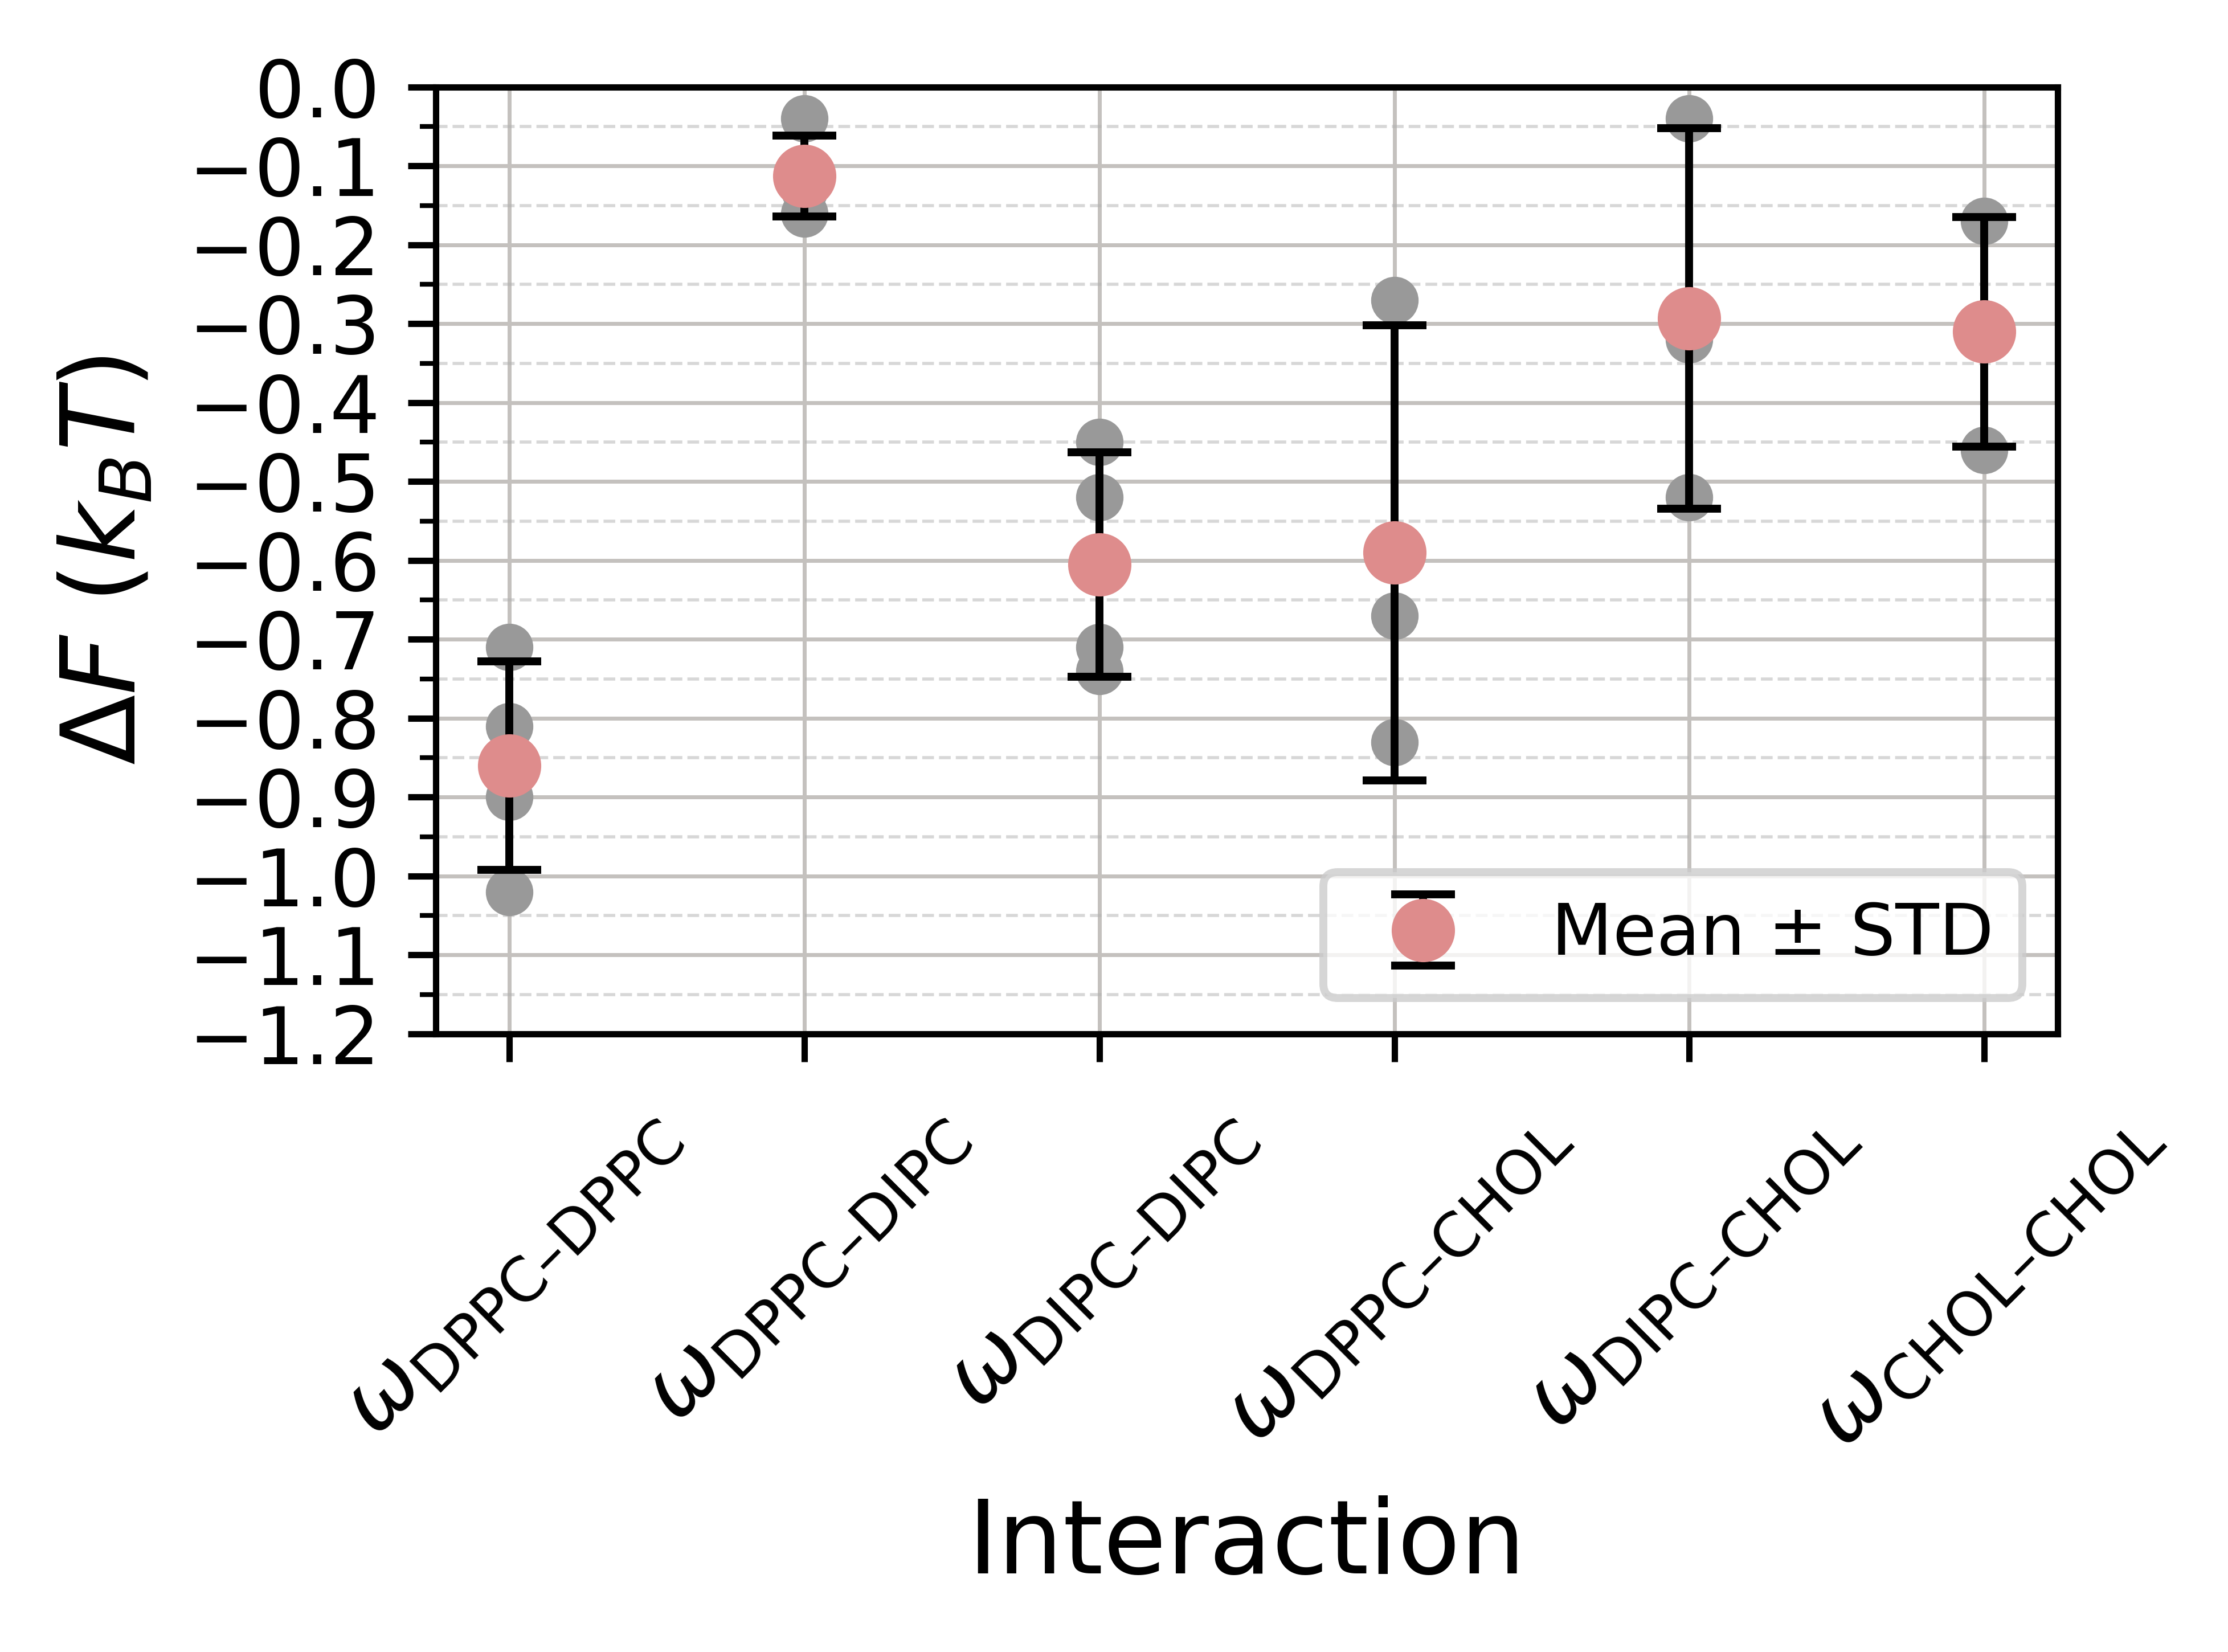

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import os

# -----------------------------
# Load the ΔG data
# -----------------------------
csv_path = "plots/pmf_deltaG_table.csv"  # Adjust path if needed
df = pd.read_csv(csv_path)

# Ensure ΔG is float
df["ΔG (kBT)"] = df["ΔG (kBT)"].astype(float)

# -----------------------------
# Define interaction order (raw + LaTeX label mapping)
# -----------------------------
raw_interactions = ["DPPC–DPPC", "DPPC–DIPC", "DIPC–DIPC", "DPPC–CHOL", "DIPC–CHOL", "CHOL–CHOL"]
latex_labels = [
    r"$\omega_{\mathrm{DPPC–DPPC}}$",
    r"$\omega_{\mathrm{DPPC–DIPC}}$",
    r"$\omega_{\mathrm{DIPC–DIPC}}$",
    r"$\omega_{\mathrm{DPPC–CHOL}}$",
    r"$\omega_{\mathrm{DIPC–CHOL}}$",
    r"$\omega_{\mathrm{CHOL–CHOL}}$"
]
interaction_to_label = dict(zip(raw_interactions, latex_labels))
interaction_to_x = {k: i for i, k in enumerate(raw_interactions)}

# -----------------------------
# Start plotting
# -----------------------------
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(figsize=(4, 3), dpi=1000)

# Scatter individual data points
for interaction, group in df.groupby("Interaction"):
    if interaction in interaction_to_x:
        x = [interaction_to_x[interaction]] * len(group)
        ax.scatter(x, group["ΔG (kBT)"], color="#999999", s=25, zorder=2)

# Compute mean and std for each group and overlay
summary = df.groupby("Interaction")["ΔG (kBT)"].agg(["mean", "std"]).reindex(raw_interactions)

ax.errorbar(
    x=range(len(raw_interactions)),
    y=summary["mean"],
    yerr=summary["std"],
    fmt='o',
    markersize=7,
    capsize=4,
    color="#DE8C8C",
    ecolor="black",
    elinewidth=1.0,
    linewidth=1.5,
    label="Mean ± STD",
    zorder=3
)

# -----------------------------
# Customize axes
# -----------------------------
ax.set_xticks(range(len(latex_labels)))
ax.set_xticklabels(latex_labels, rotation=45, fontsize=11)
ax.set_ylabel(r"$\Delta F$ ($k_BT$)", fontsize=13)
ax.set_xlabel("Interaction", fontsize=13)
ax.set_ylim([-1.2, 0])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(visible=True, which='major', color='#C4C1BE', linestyle='-', linewidth=0.5)
ax.grid(visible=True, which='minor', linestyle='--', linewidth=0.4, alpha=0.5)
ax.legend(fontsize=9, loc='lower right')

# -----------------------------
# Save and show
# -----------------------------
plt.tight_layout()
os.makedirs("plots_ms", exist_ok=True)
plt.savefig("plots_ms/pmf_deltaG_scatter_mean_std_M3opnebeta.png", dpi=1000)
plt.show()


### STEP 2: 

Next step is Regular solution theory simulation of desired Flory Matrix of interest using Flory package from David Zwicker Group. For quick test the data generated already provided in folder "data". To save time for user.

### Example usage of Flory package. Disclaimer Code will run only when all the dependencies are installed in users python environment. 

Follow instruction from: Qiang et al., (2025). flory: A Python package for finding coexisting phases in multicomponent mixtures. Journal of Open Source Software, 10(107), 7388, https://doi.org/10.21105/joss.07388

### Example FLory Matrix of interest

In [ ]:


scale = 1
DPPC_DIPC = 1.34/scale
DPPC_CHOL = -0.06/scale
DIPC_CHOL = 0.8/scale

## FH simulation tutorial

In [ ]:
import os
##import mm
import sys
locpath="/projectnb/mcprot/nayaksp/from_sangram/multicomp_zwicker/multicomponent-mixtures-main-unequal/multicomponent-mixtures-main/"
sys.path.append(locpath)
import multicomp as mm
##import other module
import argparse
from collections import Counter
from itertools import product
from numpy.linalg import eig
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
import pandas as pd
from numba import njit  # package for just-in-time compilation to accelerate code
from tqdm.auto import tqdm
from joblib import Parallel, delayed


# #inputs arguments
# ########################################
# parser = argparse.ArgumentParser()
# parser.add_argument('-N', dest='num_comp', help='number of compartment', required=True, type=int)
# parser.add_argument('-rep', dest='rep', help='number of repitation', required=True, type=int)
# parser.add_argument('-sample', dest='sample', help='number of grid in phase diagram', default=12, type=int)
# args = parser.parse_args()
# num_comp = args.num_comp
# rep = args.rep
# sample = args.sample

num_comp=2
sample=100
rep=3

# Define the number of samples
sample = sample
epsilon = 0.001  # Small value to avoid zero compositions

# Generate the range for DPPC and DIPC compositions
DPPC_range = np.linspace(epsilon, 1 - epsilon, sample)
DIPC_range = np.linspace(epsilon, 1 - epsilon, sample)
print(DPPC_range)
print(DIPC_range)

# Assuming you already calculated chi values: for M3 openbeta
# chi_DPPC_DIPC = 0.48  
# chi_DPPC_CHOL = 0.02
# chi_DIPC_CHOL = 0.18

# DPPC_DIPC = chi_DPPC_DIPC*6/scale
# DPPC_CHOL = chi_DPPC_CHOL*6/scale
# DIPC_CHOL =chi_DIPC_CHOL*6/scale




DIPC_DIPC = 0
DPPC_DPPC = 0
CHOL_CHOL = 0

num_comp = num_comp
rep = rep
a_omega = 0.002
a_Js = 0.0002
chi_shift = num_comp + 2
sizes = np.array([2.0, 2.0])

def simulate(DPPC):
    DIPC = DPPC
    CHOL = 1 - DPPC - DIPC
    if CHOL > epsilon and CHOL < 1 - epsilon:  # Ensure CHOL is positive and not too large
        phases = np.zeros(num_comp + 2, int)
        
        for _ in range(rep):
            # DPPC_CHOL = -3.5/2  # Interaction parameters (example values)
            # DPPC_DIPC = 3/2
            # DIPC_CHOL = 1.98/2
            # DIPC_DIPC = 0
            # DPPC_DPPC = 0
            # CHOL_CHOL = 0
            x_11 = -2 * DPPC_CHOL
            x_22 = -2 * DIPC_CHOL
            x_12 = x_21 = DPPC_DIPC - DIPC_CHOL - DPPC_CHOL
            lipid_matrix = np.array([[x_11, x_12], 
                                     [x_21, x_22]])
            
            f = mm.FloryHuggins(chis=lipid_matrix, inert_solvent=False, sizes=sizes)
            int_matrix = f.chis
            
            # Ensure phibars sum to 1
            phibars = np.array([DPPC, DIPC])
            
            mixture = mm.MultiphaseVolumeSystem.from_average_composition(
                phibars=phibars,
                free_energy=f,
                volumes=np.ones(50),
                method='simplex'
            )
            mix_phi = mixture.phi_bar

            dyn = mm.FieldLikeRelaxationDynamics(
                mixture,
                parameters={"additional_chi_shift": chi_shift,
                            "acceptance_omega": a_omega,
                            "acceptance_Js": a_Js}
            )

            _, res = dyn.evolve(t_range=4e5, progress=False)
            phases[res.count_clusters()] += 1
            phi_dist_in_clusters = res.get_clusters()
                
        return {"DPPC_DIPC": DPPC_DIPC,"DPPC_CHOL": DPPC_CHOL,"DIPC_CHOL": DIPC_CHOL,"DIPC": DIPC, "DPPC": DPPC, "CHOL": CHOL, "phases": phases, "phi_dist": mix_phi, "phi_dist_in_clusters": phi_dist_in_clusters}
                
    

# Use joblib to parallelize the computation
results = Parallel(n_jobs=-1)(delayed(simulate)(DPPC) for DPPC, DIPC in tqdm(list(product(DPPC_range, DIPC_range))))

# Filter out None results due to instability
data = [res for res in results if res is not None]

# Convert to DataFrame and save to CSV
df1 = pd.DataFrame(data)
#df1.to_csv("ternary_phase_diagram_data.csv", index=False)
#df1.to_csv(f"../raw_data/ternary_matrix/ternary_lipid_phase_diagram_unequal_N_{num_comp}_rep_{rep}.csv", index=False)

#df1.to_hdf(f"../raw_data/ternary_matrix/ternary_lipid_phase_diagram_unequal_N_{num_comp}_rep_{rep}_{DPPC_DIPC}_{DPPC_CHOL}_{DIPC_CHOL}.h5", key='df', mode='w')
df1

### save data in the desired folder


### save data in the desired folder